In [99]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.optimizers import Adam
from keras.losses import mean_squared_error as MSE
from keras.losses import mean_absolute_error as MAE
import pandas as pd
import numpy as np

In [100]:
LEARNING_RATE = 1e-3
SEQUENCE_LENGTH = 24

In [101]:
model = Sequential([
  Input(shape=(1,7)),
  LSTM(72),
  Dense(64, activation="relu"),
  Dense(32, activation="relu"),
  Dense(16, activation="relu"),
  Dense(1, activation="relu"),
])

model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=LEARNING_RATE),
)

In [102]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_labels = MinMaxScaler(feature_range=(0, 1))
df = pd.read_csv("./upload_DJIA_table.csv")
df["days_m"] = (pd.to_datetime(df["Date"])).dt.days_in_month
df["days_w"] = (pd.to_datetime(df["Date"])).dt.day_of_week
df["days_y"] = (pd.to_datetime(df["Date"])).dt.dayofyear

Y = np.array(df['Close']).reshape(-1, 1)
Y = scaler_labels.fit_transform(Y)


df.drop(columns=["Close", "Date","Adj Close"], inplace=True)

X = np.array(df)

X = scaler.fit_transform(X)
X = np.expand_dims(X, axis=-1)

In [103]:
x = []
y = []
# model(X)
for i in range(SEQUENCE_LENGTH, X.shape[0]):
  x.append(X[i -SEQUENCE_LENGTH:i])
  y.append(Y[i])
# x, y

In [104]:
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y),test_size=.2)

In [105]:
model.fit(
  x_train,
  y_train,
  epochs=40,
  validation_split=.2
)

# scaler.inverse_transform()

Epoch 1/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 0.3176 - val_loss: 0.0058
Epoch 2/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - val_loss: 5.2520e-04
Epoch 3/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5258e-04 - val_loss: 4.5825e-04
Epoch 4/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5207e-04 - val_loss: 4.1594e-04
Epoch 5/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.2605e-04 - val_loss: 4.3572e-04
Epoch 6/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.3025e-04 - val_loss: 3.7964e-04
Epoch 7/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.8905e-04 - val_loss: 3.5643e-04
Epoch 8/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.7546e-04 - val_loss: 3.1348e-04
Epoch 9/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.5685e-04 - val_loss: 2.8520e-04
Epoch 10/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3457e-04 - val_loss: 3.7459e-04
Epoch 11/40
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.8929e-04 - val_los

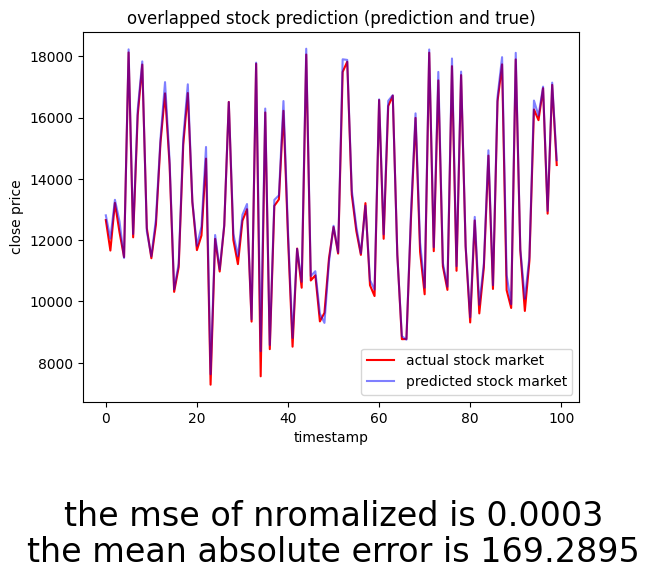

In [106]:
rng = 100
normalized_output = model(x_test)
normalized_labels = y_test
normalized_mse = np.mean(MSE(normalized_output, normalized_labels))

predicted_labels = scaler_labels.inverse_transform(normalized_output)
true_labels = scaler_labels.inverse_transform(normalized_labels)
mae = np.mean(MAE(predicted_labels, true_labels))

plt.plot(true_labels[:rng], color="red", label="actual stock market")
# plt.plot(predicted_labels[:rng], linestyle="--", color="green", label="predicted stock market")
plt.plot(predicted_labels[:rng], alpha=.5, color="blue", label="predicted stock market")
plt.text(rng / 2, 3000, f'the mse of normalized is {normalized_mse:.4f}', fontsize=24, color='Black', ha='center', va='center')
plt.text(rng / 2, 1800, f'the mean absolute error is {mae:.4f}', fontsize=24, color='Black', ha='center', va='center')
plt.title("overlapped stock prediction (prediction and true)")
plt.xlabel("timestamp")
plt.ylabel("close price")
plt.legend()
plt.show()